Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.6813 - accuracy: 0.5441 - val_loss: 0.6362 - val_accuracy: 0.6923
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6618 - val_loss: 0.5770 - val_accuracy: 0.6923
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6814 - 

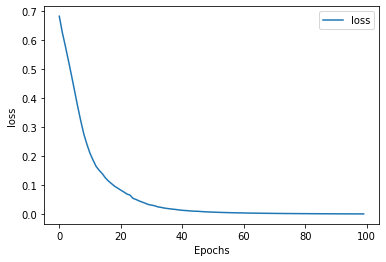

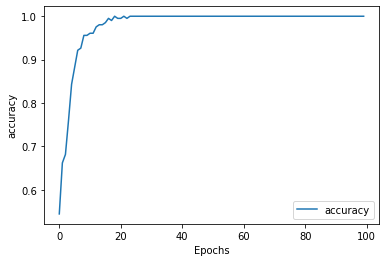

7/7 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Accuracy: 100.0 , % Loss: 0.12 %
Data: [0 1 0 1 1 0 1 1]   -  Expected: 0 	Predicted: 0
Data: [1 0 1 1 1 1 0 1]   -  Expected: 0 	Predicted: 0
Data: [1 1 1 1 0 0 1 0]   -  Expected: 1 	Predicted: 1
Data: [0 0 0 1 0 0 0 1]   -  Expected: 0 	Predicted: 0
Data: [0 0 1 0 0 0 1 1]   -  Expected: 1 	Predicted: 1
Data: [0 1 0 1 1 1 0 1]   -  Expected: 0 	Predicted: 0
Data: [1 1 1 0 1 1 1 0]   -  Expected: 0 	Predicted: 0
Data: [0 0 1 1 0 0 0 1]   -  Expected: 1 	Predicted: 1
Data: [0 0 1 1 1 0 0 1]   -  Expected: 0 	Predicted: 0
Data: [0 0 1 1 0 1 0 1]   -  Expected: 0 	Predicted: 0
Data: [0 1 1 1 0 1 1 1]   -  Expected: 0 	Predicted: 0
Data: [1 1 0 1 0 0 0 0]   -  Expected: 0 	Predicted: 0
Data: [1 0 0 0 1 0 0 0]   -  Expected: 0 	Predicted: 0
Data: [1 1 0 0 1 0 1 1]   -  Expected: 1 	Predicted: 1
Data: [1 1 1 1 1 1 1 1]   -  Expected: 0 	Predicted: 0
Data: [0 1 0 1 1 0 0 1]   -  Expected: 0 	Predicted: 0
Da

In [1]:
import numpy as np
import itertools as it
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def equation(a, b, c, d, e, f, g, h):
    if (a + c) - (e + f) + (g * h) - (b * d) < 0.5:
        return 0
    else:
        return 1

def get_data():
    data = []
    for row in list(it.product((0,1), repeat=8)):
        data.append(list(row))
        data[-1].append(equation(*row))
    data = np.array(data)
    # for row in data:
    #     print(row)
    # print("\n\n")
    np.random.shuffle(data)
    train, test = train_test_split(data, test_size=0.2)
    val, test = train_test_split(test, test_size=0.5)
    train_x, train_y = np.split(train, [-1], axis=1)
    val_x, val_y = np.split(val, [-1], axis=1)
    test_x, test_y = np.split(test, [-1], axis=1)
    # for i, row in enumerate(train):
    #     print(row, " - ", train_x[i], "\t", train_y[i])
    return train_x, train_y, val_x, val_y, test_x, test_y

def build_model(input_size):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(64, input_dim=input_size, activation='relu'))
  model.add(tf.keras.layers.Dense(32, input_dim=64, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.summary()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def plot_graphs(fname, history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()
    plt.close()

train_x, train_y, val_x, val_y, test_x, test_y = get_data()

model = build_model(train_x.shape[1])

history = model.fit(train_x, train_y, epochs=100, batch_size=17, validation_data=(val_x, val_y))

plot_graphs("loss", history, 'loss')
plot_graphs("acc", history, 'accuracy')

loss, accuracy = model.evaluate(train_x, train_y)
print('Accuracy:', round(100*accuracy, 2), ', % Loss:', round(100*loss, 2), '%')

predictions = model.predict(test_x)
for i, row in enumerate(test_x):
    print("Data:", row, "  -  Expected:", test_y[i][0], "\tPredicted:", int(np.round(predictions[i][0])))

In [2]:
train_x.shape

(204, 8)

In [3]:
for i in range(1, 205):
    if 204 % i == 0:
        print(i, "-", 204/i)

1 - 204.0
2 - 102.0
3 - 68.0
4 - 51.0
6 - 34.0
12 - 17.0
17 - 12.0
34 - 6.0
51 - 4.0
68 - 3.0
102 - 2.0
204 - 1.0
